<a href="https://colab.research.google.com/github/AriYusa/kingdom-rl/blob/master/moondream2_test_qa_environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.2.post1-cp310-cp310-linux_x86_64.whl size=190160474 sha256=0b454d9e650bfc437cc71335080172a5d05f51eab355636c9d5b7321fec7318e
  Stored in directory: /root/.cache/pip/wheels/da/ec/5b/b2c37a8e4f755ad82492a822463bca0817f0e0e11de874b550
Successfully built flash-attn


In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image
import torch

model_id = "vikhyatk/moondream2"
revision = "2024-08-26"  # Pin to specific version
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision,
    torch_dtype=torch.float16, attn_implementation="flash_attention_2"
).to("cuda")

tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.
PhiForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to upda

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [144]:
img = Image.open('/content/235732.png')
img = img.resize((640, 360), Image.Resampling.LANCZOS)

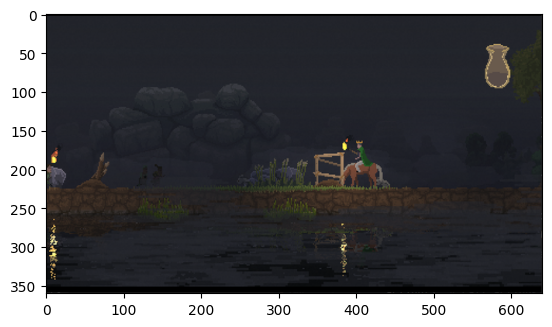

In [145]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [146]:
enc_image = model.encode_image(img)

In [147]:
main_text = """You will see a screenshot of game "Kingdom: New Lands". It is:
● Main character - ruler, he has his horse and a bag of coins (usually bag is shown in the upper right corner, but when not using money for a long time the image of bag is not shown).
● Greedy opponents who will try to steal your coins and crown every night (stop them from doing it!).
● Loyal helpers (Archers, Workers, the Merchant with his donkey) to build, attack and defend your kingdom.
● The player has to build a ship before winter. The winter starts after 20th day. The number of the day is depicted once a day as a Roman Numeral in the center of the picture"
"""

In [148]:
character = "Greedy"
question = f"Question: Is there an {character} in the image? How many?"
question = "Question: Is the any Roman Numeral in the picture? If yes, what Numeral?"
question = f"Question: How many coins are in the bag?"

In [149]:
request = main_text + "\n\nLook at the picture and answer the question. " + question

In [150]:
print(request)

You will see a screenshot of game "Kingdom: New Lands". It is:
● Main character - ruler, he has his horse and a bag of coins (usually bag is shown in the upper right corner, but when not using money for a long time the image of bag is not shown).
● Greedy opponents who will try to steal your coins and crown every night (stop them from doing it!).
● Loyal helpers (Archers, Workers, the Merchant with his donkey) to build, attack and defend your kingdom.
● The player has to build a ship before winter. The winter starts after 20th day. The number of the day is depicted once a day as a Roman Numeral in the center of the picture"


Look at the picture and answer the question. Question: How many coins are in the bag?


es,

In [151]:
print(model.answer_question(enc_image, request, tokenizer))

1
